In [1]:
import zipfile
from zipfile import ZipFile
import os, shutil
import numpy as np
import pandas as pd
import math
from math import ceil
from IPython.display import display
from PIL import Image

The dataset has been obtained from the following URL: https://www.kaggle.com/coreylammie/deepweedsx
For more information pertaining to the dataset please visit the above mentioned URL

From the above URL, we get the following information about the weeds species and they have been labelled in this manner:
0- Chinee Apple 1- Lantana 2- Parkinsonia 3- Parthenium 4- Prickly Acacia 5- Rubber Vine 6- Siam Weed 7- Snake Weed 8- Other

In [2]:
weeds_list = ['Chinee Apple', 'Lantana', 'Parkinsonia', 'Parthenium', 'Prickly Acacia', 'Rubber Vine', 'Siam Weed', 'Snake Weed', 'Other']
weeds_type_dict = {}
for i in range(len(weeds_list)):
    weeds_type_dict['weed_type_' + str(i)] = weeds_list[i]
print(weeds_type_dict)

{'weed_type_0': 'Chinee Apple', 'weed_type_1': 'Lantana', 'weed_type_2': 'Parkinsonia', 'weed_type_3': 'Parthenium', 'weed_type_4': 'Prickly Acacia', 'weed_type_5': 'Rubber Vine', 'weed_type_6': 'Siam Weed', 'weed_type_7': 'Snake Weed', 'weed_type_8': 'Other'}


In [3]:
def unzip_weed_files(zipFilePath, unzip_directory):
    weeds_zip = ZipFile(zipFilePath, 'r')
    weeds_zip.extractall(unzip_directory)
    weeds_zip.close()
    

In [4]:
def delete_file_directory(path, isDirectory):
    if isDirectory:
        shutil.rmtree(path)
    else:
        os.remove(path)

In [5]:
unzip_weed_files('deepweedsx.zip', 'unzipped_weeds_data')

In [6]:
unzip_weed_files('unzipped_weeds_data/DeepWeeds_Images_256.zip', 'unzipped_weeds_data/unzipped_weeds_imgs')

In [7]:
len(os.listdir('unzipped_weeds_data/unzipped_weeds_imgs'))

17536

In [8]:
#Since, we have unzipped the images, we can delete the zip file of images, to release memory
delete_file_directory('unzipped_weeds_data/DeepWeeds_Images_256.zip', False)

In [9]:
test_df = pd.read_csv('unzipped_weeds_data/test_set_labels.csv')

In [10]:
test_df.head()

Label  Species
0  20160928-141107-0.jpg        0
1  20160928-141135-0.jpg        0
2  20161207-110730-0.jpg        0
3  20161207-110850-0.jpg        0
4  20161207-112015-0.jpg        0

In [11]:
test_img_label_dict = dict(zip(test_df['Label'], test_df['Species']))

In [12]:
test_df.dtypes

Label      object
Species     int64
dtype: object

In [13]:
test_df['Species'].value_counts()

8    1301
0     161
6     153
1     152
4     152
2     147
3     146
7     145
5     144
Name: Species, dtype: int64

In [14]:
main_df = pd.read_csv('unzipped_weeds_data/train_set_labels.csv')

In [15]:
main_df.head()

Label  Species
0  20161207-111327-0.jpg        0
1  20170718-095159-2.jpg        0
2  20170811-133439-1.jpg        0
3  20170811-133752-1.jpg        0
4  20170217-114015-0.jpg        0

In [16]:
main_df.dtypes

Label      object
Species     int64
dtype: object

In [17]:
main_df['Species'].value_counts()

8    7804
0     964
6     921
1     912
4     910
2     884
3     876
7     871
5     865
Name: Species, dtype: int64

We can see from above that the number of images of class 8 is very large when compared to the other classes of weeds. This will lead to class imbalance. So, we will take only a subset of images from class 8 whose size is comparable to those of other classes.

In [18]:
main_img_label_dict = dict(zip(main_df['Label'], main_df['Species']))

In [19]:
base_dir = 'unzipped_weeds_data'
test_dir = os.path.join(base_dir, 'test_data')
os.mkdir(test_dir)

In [20]:
main_dir = os.path.join(base_dir, 'main_data')
os.mkdir(main_dir)

In [21]:
def create_weed_type_dir(parent_dir):
    for i in range(9):
        weed_type_dir = os.path.join(parent_dir, 'weed_type_' + str(i))
        os.mkdir(weed_type_dir)
        

In [22]:
create_weed_type_dir(test_dir)

In [23]:
create_weed_type_dir(main_dir)

In [24]:
img_files = os.listdir('unzipped_weeds_data/unzipped_weeds_imgs')

In [25]:
def copy_paste_weed_imgs(img_label_dict, copy_dir, paste_dir, max_num_of_files):
    for img in img_files:
        if img in img_label_dict:
            weed_type_dir = os.path.join(paste_dir, 'weed_type_' + str(img_label_dict[img]))
            if len(os.listdir(weed_type_dir)) <= max_num_of_files:
                src = os.path.join(copy_dir, img)
                dst = os.path.join(weed_type_dir, img)
                shutil.copyfile(src, dst)   

In [26]:
copy_paste_weed_imgs(test_img_label_dict, 'unzipped_weeds_data/unzipped_weeds_imgs', 'unzipped_weeds_data/test_data', 161)

In [27]:
copy_paste_weed_imgs(main_img_label_dict, 'unzipped_weeds_data/unzipped_weeds_imgs', 'unzipped_weeds_data/main_data', 964)

In [28]:
#The images have been transferred to main_data and test_data folders, so, we don't need the unzipped_weeds_imgs folder. Let us delete it release memory.
delete_file_directory('unzipped_weeds_data/unzipped_weeds_imgs', True)

In [29]:
#Let us check the number of images in each weed type (main_data and test_data)
for i in range(9):
    cur_weed_type = 'weed_type_' + str(i)
    print(cur_weed_type)
    print('number of images in main', len(os.listdir('unzipped_weeds_data/main_data/' + cur_weed_type)))
    print('number of images in test', len(os.listdir('unzipped_weeds_data/test_data/' + cur_weed_type)))

weed_type_0
number of images in main 964
number of images in test 161
weed_type_1
number of images in main 912
number of images in test 152
weed_type_2
number of images in main 884
number of images in test 147
weed_type_3
number of images in main 876
number of images in test 146
weed_type_4
number of images in main 910
number of images in test 152
weed_type_5
number of images in main 865
number of images in test 144
weed_type_6
number of images in main 921
number of images in test 153
weed_type_7
number of images in main 871
number of images in test 145
weed_type_8
number of images in main 965
number of images in test 162


Now we will split the 'main_data' into 'train_data' and 'val_data'. 20% of the data in main data will be used for validation.

In [30]:
train_dir = os.path.join(base_dir, 'train_data')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val_data')
os.mkdir(val_dir)

In [31]:
create_weed_type_dir(train_dir)
create_weed_type_dir(val_dir)

In [32]:
total_train_imgs = 0
total_val_imgs = 0
for i in range(len(weeds_list)):
    cur_weed_type = 'weed_type_' + str(i)
    copy_dir = 'unzipped_weeds_data/main_data/' + cur_weed_type
    paste_dir_train = 'unzipped_weeds_data/train_data/' + cur_weed_type
    paste_dir_val = 'unzipped_weeds_data/val_data/' + cur_weed_type
    cur_imgs = os.listdir(copy_dir)
    cur_num_of_imgs = len(cur_imgs)
    cur_num_of_train_imgs = ceil(0.8*cur_num_of_imgs)
    total_train_imgs += cur_num_of_train_imgs
    cur_num_of_val_imgs = cur_num_of_imgs - cur_num_of_train_imgs
    total_val_imgs += cur_num_of_val_imgs
    for j in range(cur_num_of_imgs):
        src = os.path.join(copy_dir, cur_imgs[j])
        if j < cur_num_of_train_imgs:
            dst = os.path.join(paste_dir_train, cur_imgs[j])
        else:
            dst = os.path.join(paste_dir_val, cur_imgs[j])
        shutil.copyfile(src, dst)
            
    
    

In [33]:
print('total train images', total_train_imgs)
print('total validation images', total_val_imgs)

total train images 6537
total validation images 1631


In [34]:
delete_file_directory('unzipped_weeds_data/main_data', True)

Let us see the images of weeds belonging to each class. we are going to show 4 images per class here. Let us see the images from the train_data folder

weed_type_0: Chinee Apple


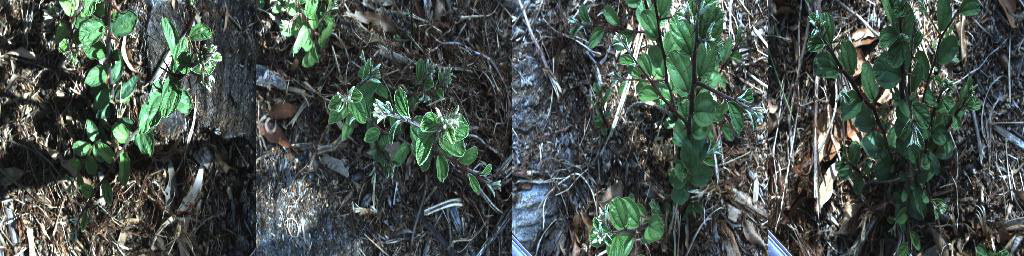

weed_type_1: Lantana


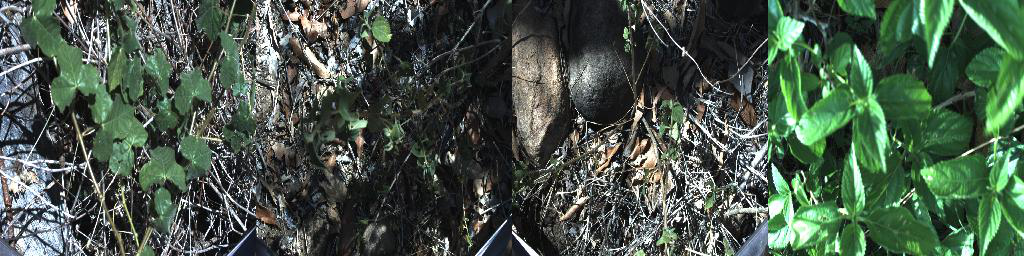

weed_type_2: Parkinsonia


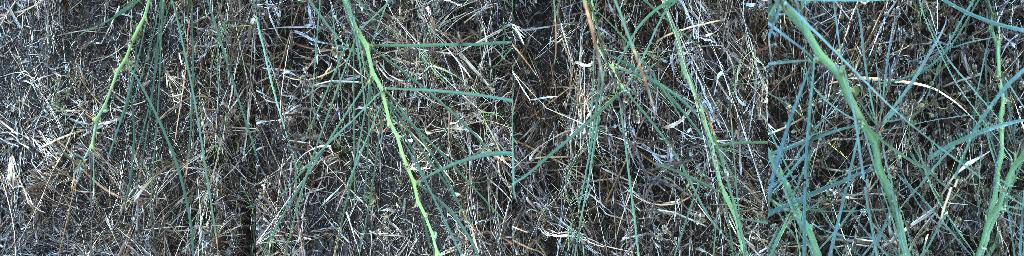

weed_type_3: Parthenium


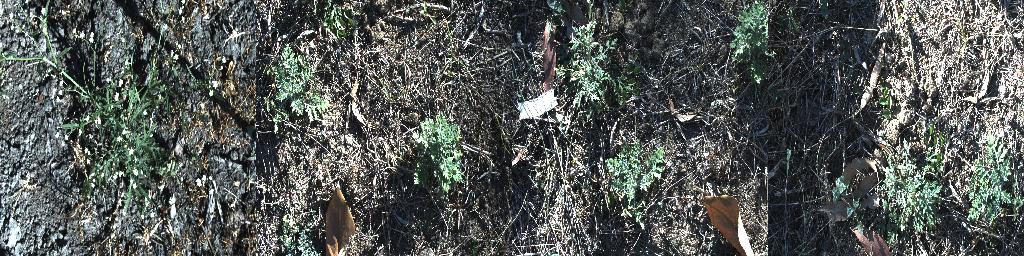

weed_type_4: Prickly Acacia


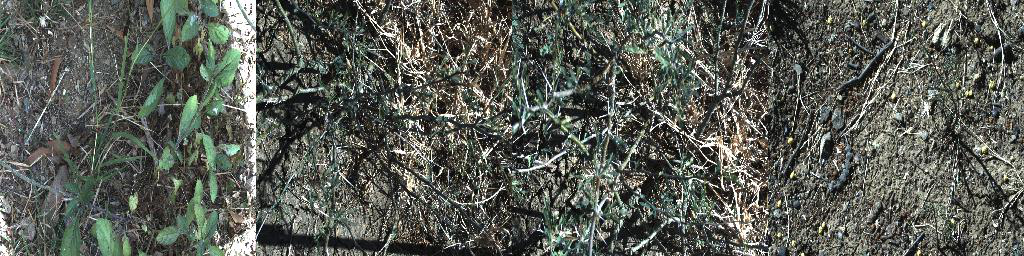

weed_type_5: Rubber Vine


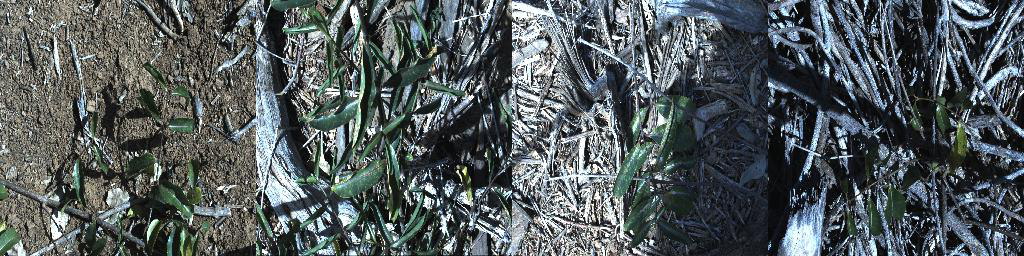

weed_type_6: Siam Weed


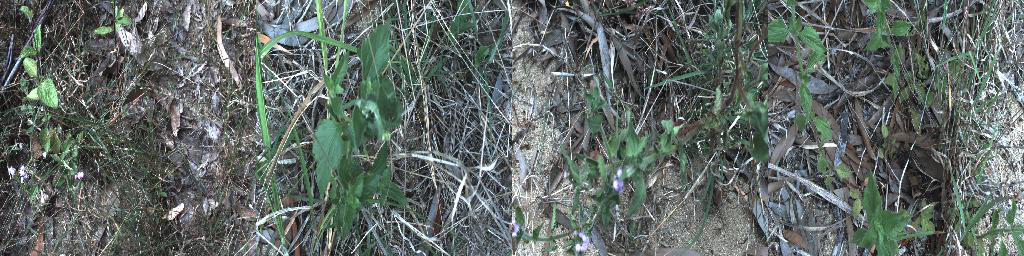

weed_type_7: Snake Weed


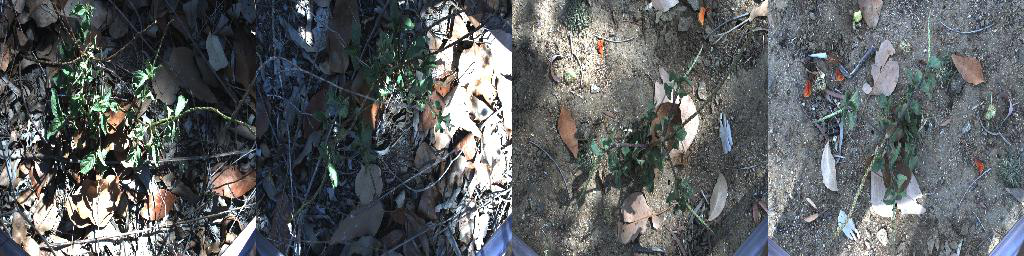

weed_type_8: Other


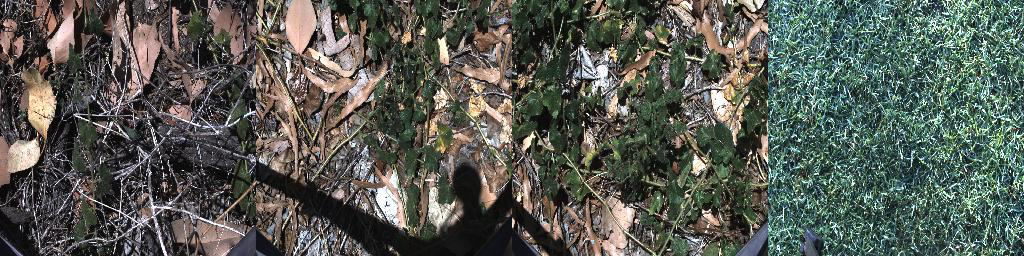

In [45]:
for i in range(len(weeds_list)):
    cur_weed_type = 'weed_type_' + str(i)
    print(cur_weed_type + ': ' + weeds_type_dict[cur_weed_type])
    cur_weed_type_dir = 'unzipped_weeds_data/train_data/' + cur_weed_type
    cur_weed_type_imgs = os.listdir(cur_weed_type_dir)[:4]
    canvas_sheet_width = 1024
    canvas_sheet_height = 256
    canvas_sheet = Image.new('RGB', (canvas_sheet_width, canvas_sheet_height))
    x = 0
    for cur_img in cur_weed_type_imgs:
        img = Image.open(cur_weed_type_dir + '/' + cur_img)
        canvas_sheet.paste(img, (x, 0))
        x += 256
    display(canvas_sheet)
        